<a href="https://colab.research.google.com/github/Lucka-Gianvechio/klp-Projeto-IC/blob/main/Projeto_IC_KLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introdução 

Neste projeto analisaremos um conjunto de dados do pacote scikit-learn. Esses dados são originalmente do repositório de Machine Learning da UCI e podem ser carregados utilizando a biblioteca sklearn.

O conjunto de dados contém 506 entradas, 13 features e 1 target com informações de várias casas em Boston, Massachusetts.  

Nosso objetivo é desenvolver e avaliar o desempenho de um modelo preditivo de valores de imovéis, começando pela abertura dos dados, análise descritiva das variáveis, criação de insights e a modelagem preditiva de regressão.

#Importando as bibliotecas necessárias para a manipulação dos dados

In [43]:
#Importando as bibliotecas necessárias para manipulação e visualização dos dados.

import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway, chisquare
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.metrics import mean_squared_error as mse, r2_score as r

#Carregando os dados e criando um Dataframe

In [44]:
boston = datasets.load_boston(return_X_y = False)



1.   Número de casos: 506


2.   Variáveis (14 atributos):

* CRIM - Taxa de criminalidade per capita.
* ZN - A proporção de terrenos residenciais zoneada para lotes com mais de 25.000 pés quadrados.
* INDUS - A proporção de acres comerciais não varejistas por cidade.
* CHAS - Variável dummy de Charles River (= 1 se o trato da casa limita o rio ou 0 caso contrário).
* NOX - Concentração de óxidos nítricos (partes por milhão).
* RM - O número médio de quartos por habitação.
* AGE - A proporção de unidades ocupadas pelo proprietário construídas antes de 1940.
* DIS - Distâncias ponderadas para cinco centros de emprego em Boston.
* RAD - Índice de acessibilidade às autoestradas radiais.
* TAX - Taxa de imposto sobre propriedades de valor integral por US\$ 10.000.
* PTRATIO - Relação aluno-professor por cidade.
* B - $1000 (Bk - 0,63) ^ 2$ onde Bk é a proporção de negros por cidade.
* LSTAT - Percentagem de status inferior da população.
* PRICE - Valor médio das casas em US\$1.000.







In [45]:
# criando dataframe
dataframe = pd.DataFrame(data = boston.data, columns = boston.feature_names)

In [46]:
#Dataframe com "data" e "target" concatenados
dataframe['PRICE'] = boston.target

In [47]:
#Número de linhas e colunas do Dataframe
dataframe.shape

(506, 14)

#Análise Exploratória dos Dados

Primeiro vamos vizualizar as primeiras 15 linhas para ter uma ideia do tipo dos dados.

In [48]:
dataframe.head(15)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


Podemos perceber que as colunas 'CHAS' e 'RAD' assumem valores discretos, sendo que 'CHAS' é uma variável dicotômica, assumindo valores 0 ou 1. As demais colunas assumem valores contínuos.

Vamos tratar os valores de 'CHAS' e 'RAD' para serem inteiros.

In [49]:
dataframe = dataframe.astype({'CHAS': int, 'RAD': int})
dataframe.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Temos então a tabela que descreve as características principais dos dados.

In [50]:
dataframe.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


A tabela acima nos mostra a quantidade de elementos de cada feature, suas médias, seus desvios-padrão e seus *quantis* empíricos. A partir disso já podemos distinguir algumas peculiaridades entre as features. 

Temos 3 variáveis que apresentam uma enorme assimetria: "CRIM", "ZN" e "B".

Além disso, percebemos que a variável "TAX" apresenta um valor considerável de desvio padrão, provavelmente apresentando um gáfico irregular ou achatado.

Ainda, temos que a variável "CHAS", dicotômica, apresenta uma maior quantidade de valores "0", ou seja, uma quantidade esmagadora de casas estão longe do rio.

A tabela que descreve as características gerais das variáveis é muito útil para compreender um pouco o comportamento de nossas *features* a um primeiro olhar. Agora, devemos nos atentar aos histogramas e aos demais gráficos para entendermos melhor seus comportamentos.


##Analisando os gráficos
Observaremos o comportamento dos histogramas, gráficos de densidade e barras e box-plots para entendermos o comportamento das features individualmente.

###Discretas

####CHAS
Indicador de proximidade da propriedade ao "Charles River".

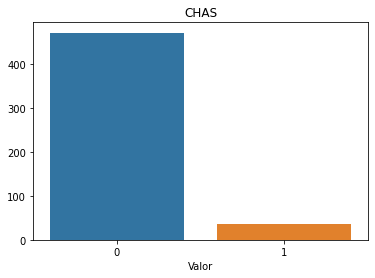

In [51]:
#Countplot
sns.countplot(x = dataframe['CHAS'])
plt.xlabel("Valor")
plt.ylabel("")
plt.title("CHAS")
plt.show()

O gráfico mostra como a esmagadora maioria dos nossos dados assume valor "0" para a variável. Isso faz todo sentido, pois a variável mede a proximidade da casa a um rio dicotomicamente, e, como o rio tem um determinado perímetro, é natural que o número de casas seja maior longe do rio do que perto.


####RAD
 Índice de acessibilidade às autoestradas radiais.



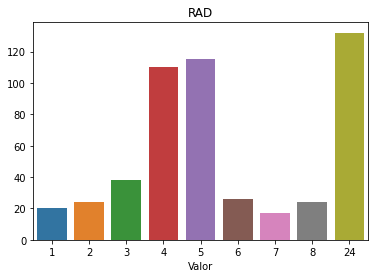

In [52]:
#CountPlot
sns.countplot(x = dataframe['RAD'])
plt.xlabel("Valor")
plt.ylabel("")
plt.title("RAD")
plt.show()


Temos uma variável do tipo *ordinal*, ou seja, existe uma forma de ranqueamento entre os valores que essa variável assume. Nesse caso, quanto maior o valor, maior o grau de acessibilidade às estradas radiais.

Podemos perceber que, entre 1 e 8, nossa variável se comporta com tendencia central, contudo, temos um valor se destacando no extremo direito do gráfico, onde o valor 24 é dominante em relação aos outros valores.

É possível concluir desses dados que o número de pessoas com um acesso médio e muito alto é destacadamente maior do que o número de pessoas com um acesso médio-alto, médio baixo ou baixo. Contudo, essa assimetria levanta uma suspeita quanto a validade dessa parte dos dados, que talvez precisem de algum processo de tratamento.

###Contínuas
####Análise de Histogramas

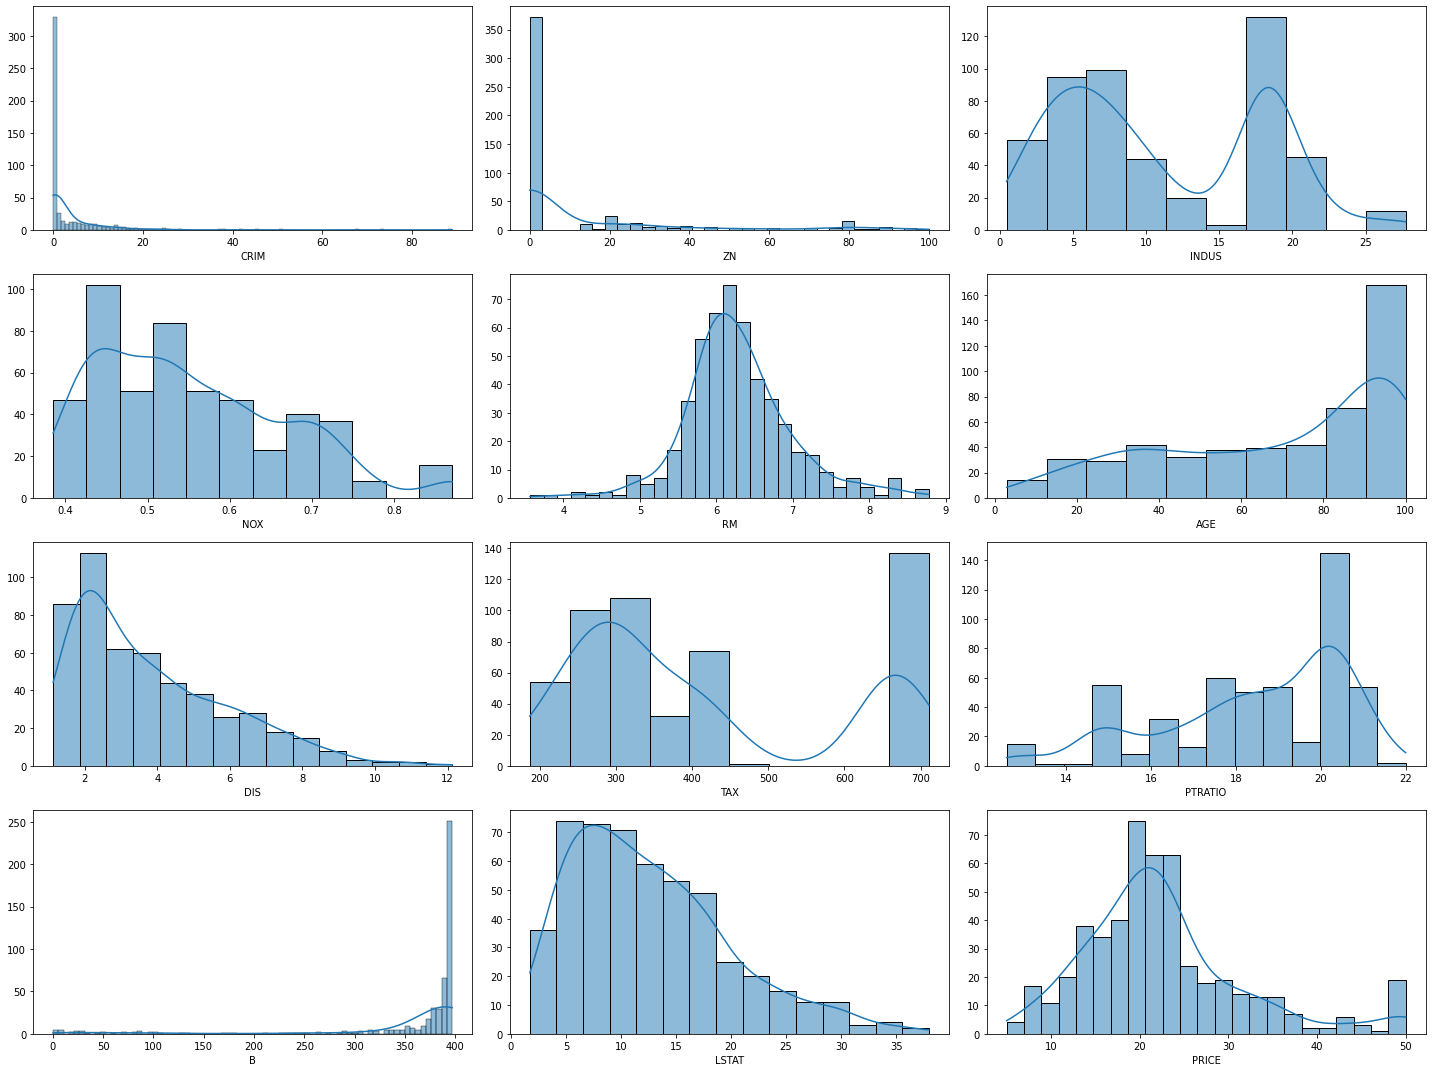

In [53]:
colunas_continuas = ['CRIM', 'ZN', 'INDUS','NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE']


fig, ax = plt.subplots(nrows = 4, ncols = 3, figsize=(20,15))
k = 0

####Gráfico conjunto das colunas contínuas com o preço médio das casas
for i in range(4):
    for j in range(3):
        sns.histplot(x = dataframe[colunas_continuas[k]], ax = ax[i][j], kde = True)
        ax[i][j].set_ylabel("")
        k += 1

plt.tight_layout()
plt.show()

A cada histograma foi associado uma metrica denominada kde(*kernel density estimation*), que seria uma forma não paramétrica para estimar a função densidade.

Analisando os histogramas podemos destacar as *features* "CRIM", "ZN" e "B" que apresentam *outlier*, ou seja, como foi possiível observar junto ao método *describe*, existe uma discrepância entre a distribuição dos *quantis* empíricos. 

Podemos também destacar as variáveis "RM", "DIS" e "LSTAT" por terem um formato muito parecido com distribuições conhecidas, como a "RM" que se parece muito com uma distribuição normal. De certo modo, vemos que nossa *target* também apresenta um comportamento parecido com o de uma distribuição normal, isso é um indicativo de que talvez essas variáveis estejam altamente relacionadas com os preços.

Vamos olhar agora para os *Box-Plots* para termos uma visão mais clara acerca dos *quantis* e outras relações e irregularidades.

####BoxPlots

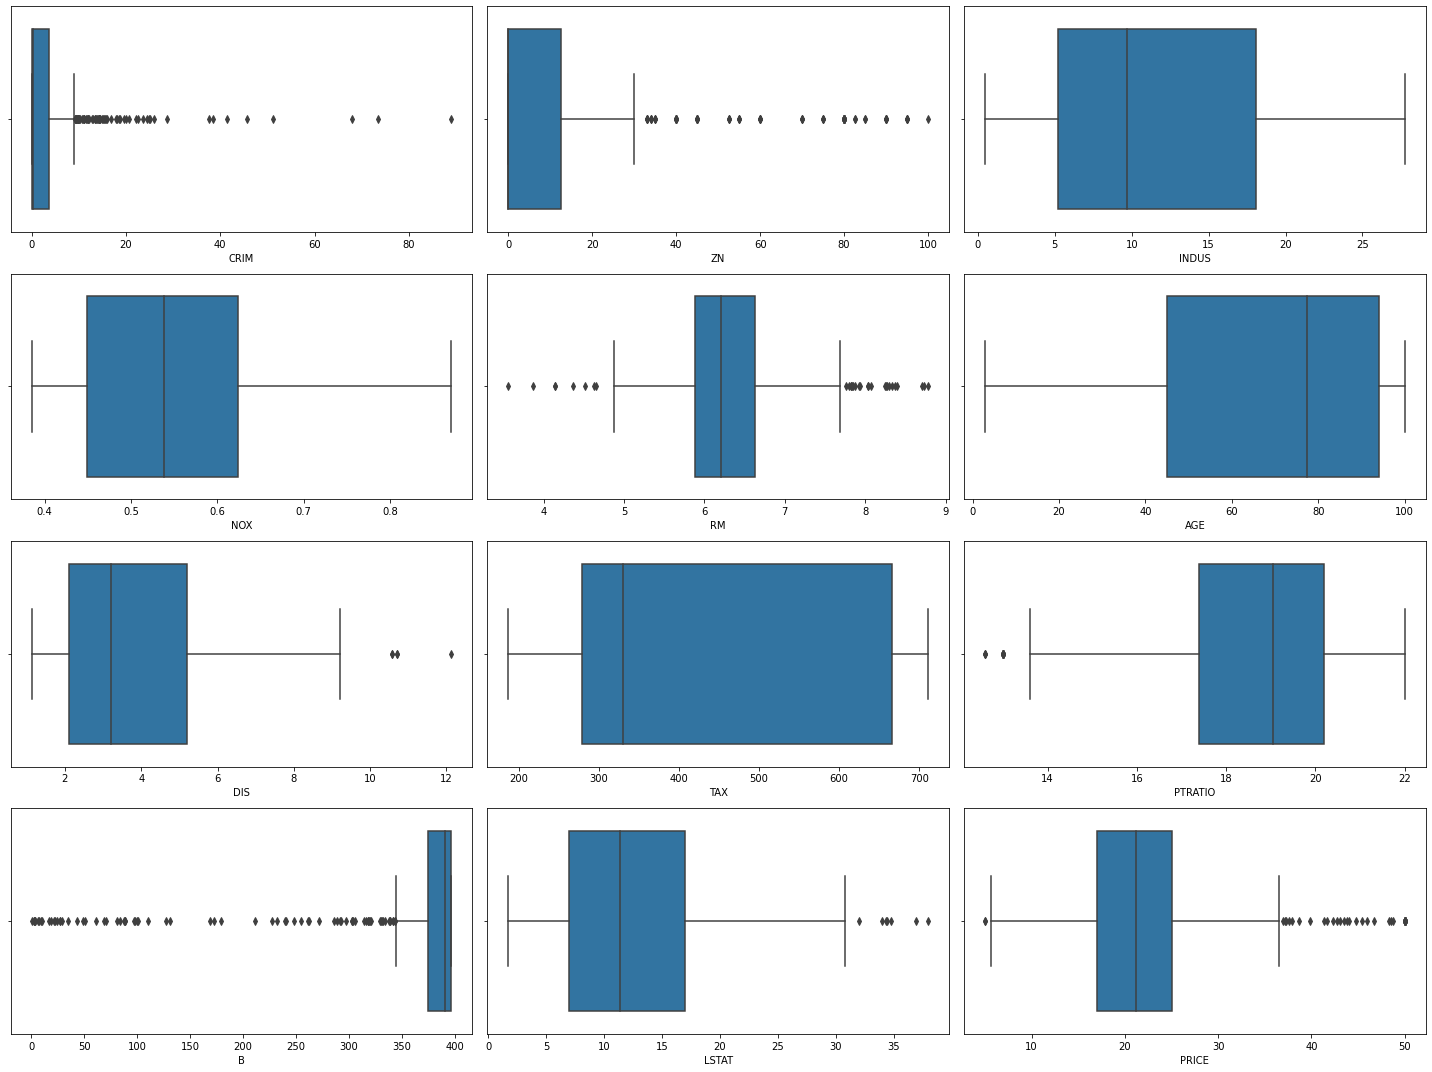

In [54]:
fig, ax = plt.subplots(nrows = 4, ncols = 3, figsize=(20,15))
k = 0

####Gráfico conjunto das colunas contínuas com o preço médio das casas
for i in range(4):
    for j in range(3):
        sns.boxplot(x = dataframe[colunas_continuas[k]], ax = ax[i][j])
        ax[i][j].set_ylabel("")
        k += 1

plt.tight_layout()
plt.show()

Com a ajuda dos boxplots, podemos perceber *outliers*  com mais clareza. Fica mais evidente que a assimetria nas variáveis "CRIM", "ZN" e "B" implíca em muitos *outiliers*.

Em contrapartida podemos destacar as seguintes variáveis:

*   **INDUS**
*   **NOX**
*   **AGE**
*   **TAX** 

Essas variáveis apresentam praticamente nenhum caso de *outlier*, isso ocorre provavelmente por conta da alta variância que acompanham essas *features*. Ainda nesse âmbito, podemos destacar secundariamente as variáveis:
*   **DIS**
*   **PTRATIO**
*   **LSTAT**

Elas recebem esse destaque por possuirem pouquíssimos casos de *outlier*, mas a variável "LSTAT" se destaca mais por conta disso, pois além de possuir uma distribuição semelhante a modelos conhecidos, por possuir poucos *outliers* pode ser considerada mais "previsível" e fácil de se modelar.



Vamos agora analisar a matriz de correlação usando um "heatmap" para as variáveis contínuas, e um teste "ANOVA" para as discretas.

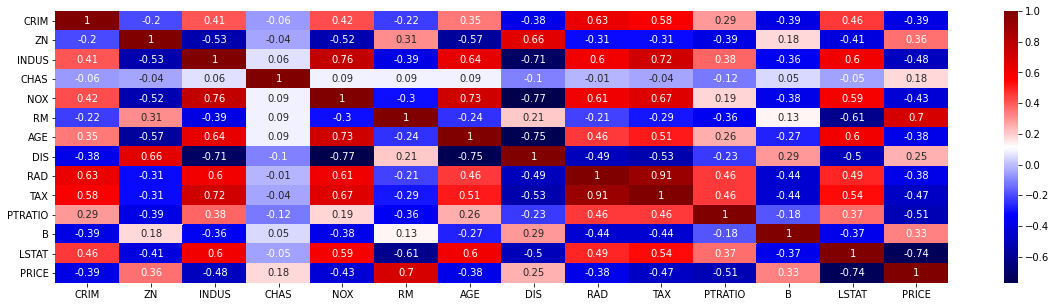

In [55]:
matriz_cor = dataframe.corr().round(2)
plt.figure(figsize=(20,5))
sns.heatmap(matriz_cor, annot = True, cmap = "seismic")
plt.show()

A partir daqui, temos uma noção de quais variáveis são mais relacionadas com a nossa *target*. Isso nos ajudará a entender melhor nossos dados.

Com auxilio desta matriz de covariancia conseguimos destacar 5 *features* que tem alta correlação com nossa *target*, que são elas:
LSTAT, RM, PTRATIO, INDUS e TAX, destacamos estas *features* por elas apresentarem as maiores correlações em valores absolutos. Além disso vamos analisar as variáveis RAD, CHAS, AGE e DIS, pois faz sentido se relacionarem com o preço das casas.

#Analise reflexiva sobre as features
**LSTAT** que denota a porcentagem de status inferior de uma populção, o que para análise não-causal faz sentido ter uma alta relação com os preços das casas, pois intuitivamente podemos dizer que quanto menor essa porcentagem maior o preço será, pois numa população com baixo status subentende-se que esta população tem alto poder aquisitivo.

**RM** é o número de quartos por habitação. É fácil perceber que essa varável tem uma relação direta com nossa *target*, pois é esperado que casas com mais cômodos sejam mais caras.

**PTRATIO** que nos diz a relação aluno-professor por cidade, provavelmente havera uma alta relação com nossa *target*, pois quanto maior essa relação, podemos entender dois casos, primeiro seria há um alto indice de evasão dos alunos ou os jovens nem conseguem entrar numa escola por necessitar de trabalhar e contribuir com a renda em casa o que denota uma populçao com baix status ou segundo caso que se tem uma boa distribuição dos alunos em ralação aos professores, nos mostrando uma boa estrutura das escolas o que nos leva a concluir que essa população tem um elevado status portanto altos preços das casas.

**TAX** é a taxa de imposto pago sobre propriedades. O natural a se imaginar é que a taxa de imposto pago seja maior para casas mais caras.

**RAD** nos diz o índice de acesso de determinada propriedade às rodovias radiais da cidade. Com isso, talvez seja possível se estabelecer uma relação com nossa *target*, pois o maior acesso às rodovias implicam em uma maior exposição à poluição do ar, ou então um índice maior implica em um maior acesso à infraestrutura, uma maior facilidade de acesso à outros pontos da cidade e etc.

**CHAS** é um índice binário de proximidade ao *Charles River*. Pode-se expecular que a proximidade do rio afete o preço das casas, talvez por alguma ativadade relacionada ao lazer, ou pelo risco de alagamentos.

**AGE** se relaciona com a idade das casas da cidade. Provavelmente existe uma relação entre a idade das casas e os preços, pois existe uma diferença estrutural e de técnicas de engenharia civil e arquiteturas que mudam e são valorizadas de forma diferente entre as regiões.

**DIS** representa no geral a distância das casas à centros comerciais. Casas mais próximas a centros comerciais tenderiam a ser mais caras, por exemplo, por ser uma facilidade além de ocupar o lugar de um comércio. 

Vamos agora exibir os *jointplots* para relacionar nossas *features* com nossa *target*. Vamos analisar as seguintes variáveis:

* LSTAT
* RM
* PTRATIO
* AGE
* DIS



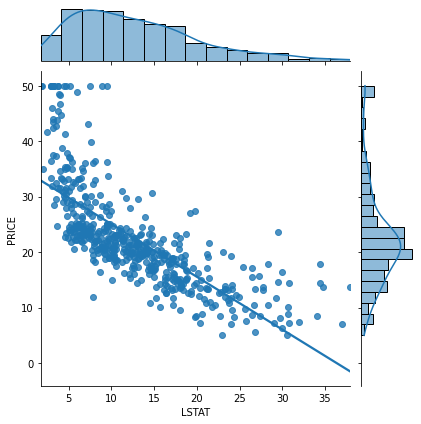

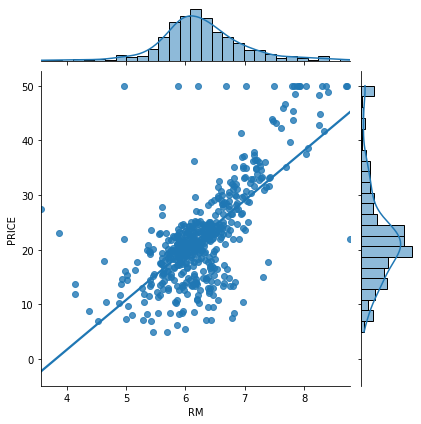

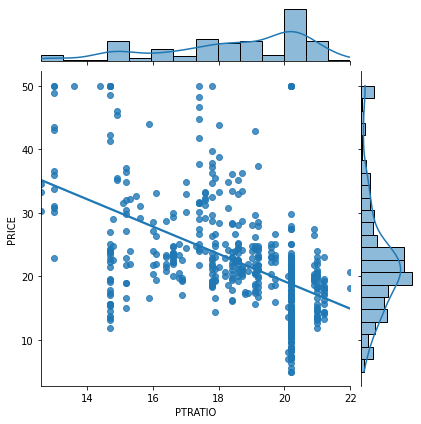

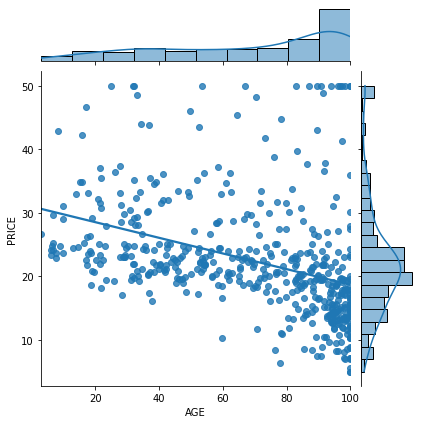

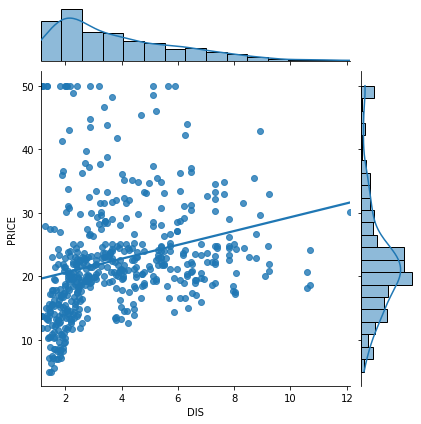

In [56]:
feats = ['LSTAT','RM','PTRATIO','AGE','DIS']

for feat in feats:
  sns.jointplot(x=dataframe[feat], y=dataframe['PRICE'],kind = "reg", ci = None)
  plt.show()

Os gráficos contam com uma prévia das regressões em relação a essas *features*. Podemos ver que de fato existem relações entre nossas variáveis e o preço das casas. As últimas duas variáveis aparentam também ter uma relação gráfica ainda mais profunda com a *target*. 

Vamos analisar a correlação de Pearson para ter ainda mais detalhes.

In [57]:
for feat in feats:
  print("{0:7}: {1:7f}".format(feat, np.corrcoef(x=dataframe[feat], y=dataframe['PRICE'])[0,1]))

LSTAT  : -0.737663
RM     : 0.695360
PTRATIO: -0.507787
AGE    : -0.376955
DIS    : 0.249929


In [58]:
features = dataframe.drop(columns = ['PRICE'])
target = dataframe['PRICE']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size =0.2, random_state = 42)

In [59]:
# iniciando metodo pra padronizar
scalar = StandardScaler()

##Processo de regularização
Iremos utilizar dois métodos de regularização que são: Lasso e Ridge

In [60]:
# Candidatos para alpha(lambda)
hyper_alpha = [0.15,0.20,0.25,0.5,0.55,0.6,0.7,0.75,1,1.25,1.5,2]

In [61]:
# iniciando listas para lasso e ridge que irão guardar erro quadratico, hyperparametro e o R^2
teste_l = []
treino_l = []
teste_r = []
treino_r = []

In [62]:
# inciando loop
for i in range(len(hyper_alpha)-1, -1, -1):

  X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42)
  # adequando e transformando os dados de treino com parametros estimados em X_train
  X_train2 = scalar.fit_transform(X_train2)
  X_val = scalar.transform(X_val)
  
  # Criando instancias de regresao linear Lasso, Ridge
  lasso = Lasso(alpha = hyper_alpha[i])
  ridge = Ridge(alpha = hyper_alpha[i])

  # Regularização Lasso
  lasso.fit(X_train2, y_train2)
  treino_predito_l = lasso.predict(X_train2)
  teste_predito_l = lasso.predict(X_val)

  # Regularzação Ridge
  ridge.fit(X_train2, y_train2)
  treino_predito_r = ridge.predict(X_train2)
  teste_predito_r = ridge.predict(X_val)

  # adicionar as predicoes nas suas respectivas listas
   
  treino_l.append([mse(y_train2, treino_predito_l), hyper_alpha[i],r(y_train2, treino_predito_l)])
  teste_l.append([mse(y_val, teste_predito_l), hyper_alpha[i], r(y_val, teste_predito_l)])

  treino_r.append([mse(y_train2, treino_predito_r), hyper_alpha[i],r(y_train2, treino_predito_r)])
  teste_r.append([mse(y_val, teste_predito_r), hyper_alpha[i], r(y_val, teste_predito_r)])


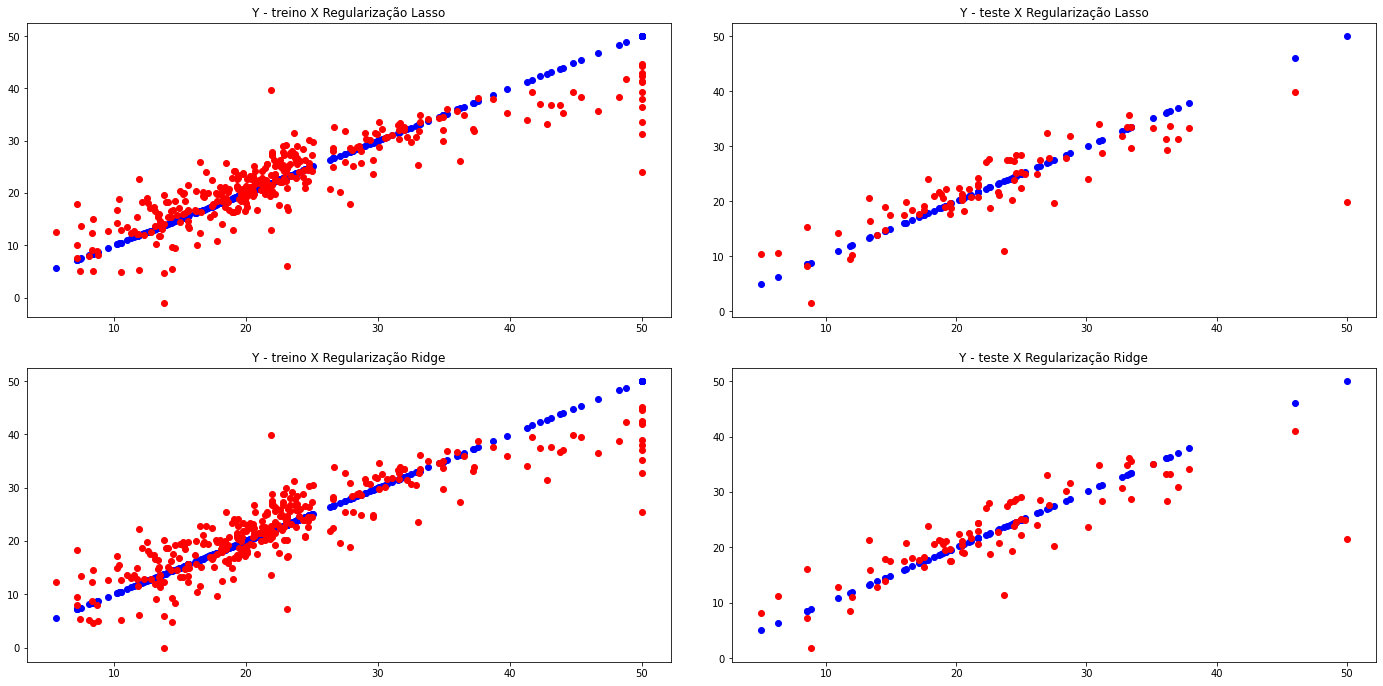

In [63]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (20,10))
fig.tight_layout(pad = 3.0)

#plota o scatterplot do y de treino com o y de treino predito junto com o valor verdadeiro usando regularização Lasso
ax[0][0].scatter(y_train2, y_train2, color = 'blue')
ax[0][0].scatter(y_train2, treino_predito_l, color = 'red')
ax[0][0].title.set_text("Y - treino X Regularização Lasso")

#plota o scatterplot do y de treino com o y de treino predito junto com o valor verdadeiro usando regularização Ridge
ax[1][0].scatter(y_train2, y_train2, color = 'blue')
ax[1][0].scatter(y_train2, treino_predito_r, color = 'red')
ax[1][0].title.set_text("Y - treino X Regularização Ridge")

#plota o scatterplot do y de teste com o y de teste predito junto com o valor verdadeiro usando reg. lasso
ax[0][1].scatter(y_val, y_val, color = 'blue')
ax[0][1].scatter(y_val, teste_predito_l, color = 'red')
ax[0][1].title.set_text("Y - teste X Regularização Lasso")

#plota o scatterplot do y de teste com o y de teste predito junto com o valor verdadeiro usando reg. ridge
ax[1][1].scatter(y_val, y_val, color = 'blue')
ax[1][1].scatter(y_val, teste_predito_r, color = 'red')
ax[1][1].title.set_text("Y - teste X Regularização Ridge")

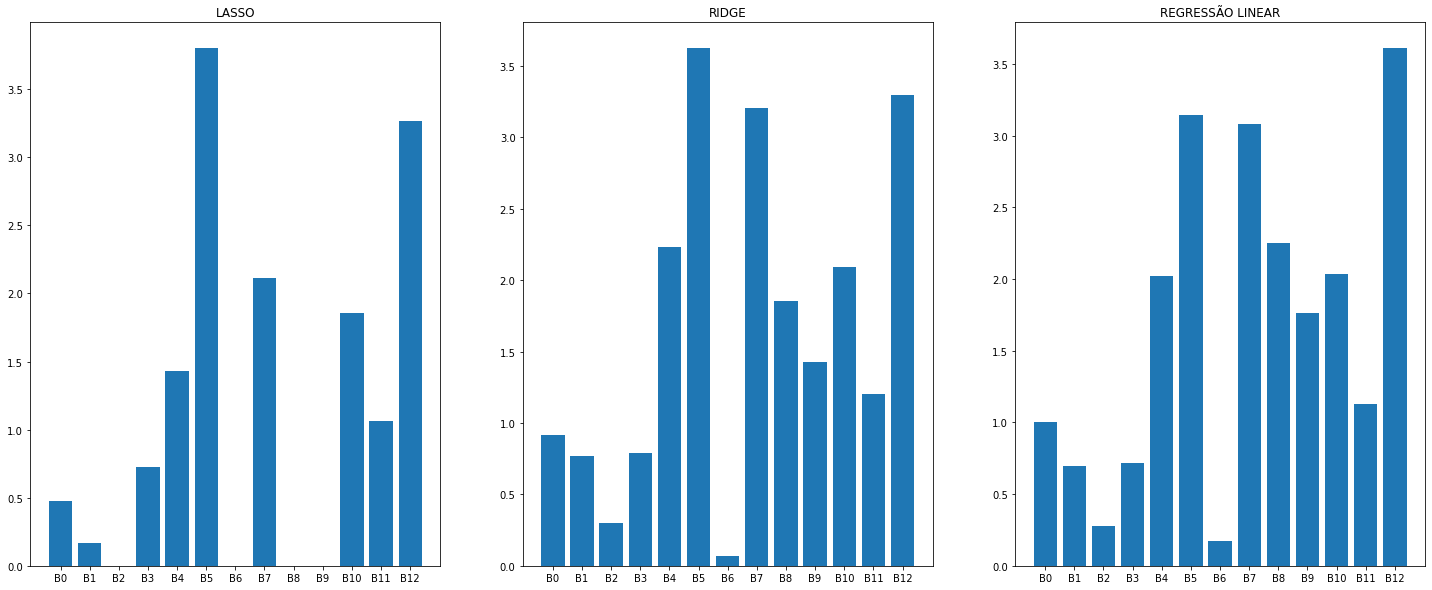

In [64]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (25, 10))

ax[0].bar(x = ["B" + str(i) for i in range(13)], height = abs(lasso.coef_))
ax[0].title.set_text("LASSO")

ax[1].bar(x = ["B" + str(i) for i in range(13)], height = abs(ridge.coef_))
ax[1].title.set_text("RIDGE")

ax[2].bar(x = ["B" + str(i) for i in range(13)], height = abs(linear_model.coef_))
ax[2].title.set_text("REGRESSÃO LINEAR")

In [65]:
# iniciando listas para lasso e ridge que irão guardar erro quadratico, hyperparametro e o R^2
teste_lr2 = []
treino_lr2 = []
teste_l2 = []
treino_l2 = []
teste_r2 = []
treino_r2 = []

In [66]:
# inciando loop
for i in range(len(hyper_alpha)):

  #X_train, X_tes, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42)
  # adequando e transformando os dados de treino com parametros estimados em X_train
  X_train = scalar.fit_transform(X_train)
  X_test = scalar.transform(X_test)
  
  #perfomando a regressão linear
  linear_model = LinearRegression()
  linear_model.fit(X_train, y_train)
  modelo_linear_predito = linear_model.predict(X_train)
  modelo_linear_preditot = linear_model.predict(X_test)

  # Criando instancias de regresao linear Lasso, Ridge
  lasso = Lasso(alpha = hyper_alpha[i])
  ridge = Ridge(alpha = hyper_alpha[i])

  # Regularização Lasso
  lasso.fit(X_train, y_train)
  treino_predito_l2 = lasso.predict(X_train)
  teste_predito_l2 = lasso.predict(X_test)

  # Regularzação Ridge
  ridge.fit(X_train, y_train)
  treino_predito_r2 = ridge.predict(X_train)
  teste_predito_r2 = ridge.predict(X_test)

  # adicionar as predicoes nas suas respectivas listas
  treino_lr2.append((mse(y_train, modelo_linear_predito), hyper_alpha[i],r(y_train, modelo_linear_predito)))
  teste_lr2.append((mse(y_test, modelo_linear_preditot), hyper_alpha[i], r(y_test, modelo_linear_preditot)))

  treino_l2.append((mse(y_train, treino_predito_l2), hyper_alpha[i],r(y_train, treino_predito_l2)))
  teste_l2.append((mse(y_test, teste_predito_l2), hyper_alpha[i], r(y_test, teste_predito_l2)))

  treino_r2.append((mse(y_train, treino_predito_r2), hyper_alpha[i],r(y_train, treino_predito_r2)))
  teste_r2.append((mse(y_test, teste_predito_r2), hyper_alpha[i], r(y_test, teste_predito_r2)))  

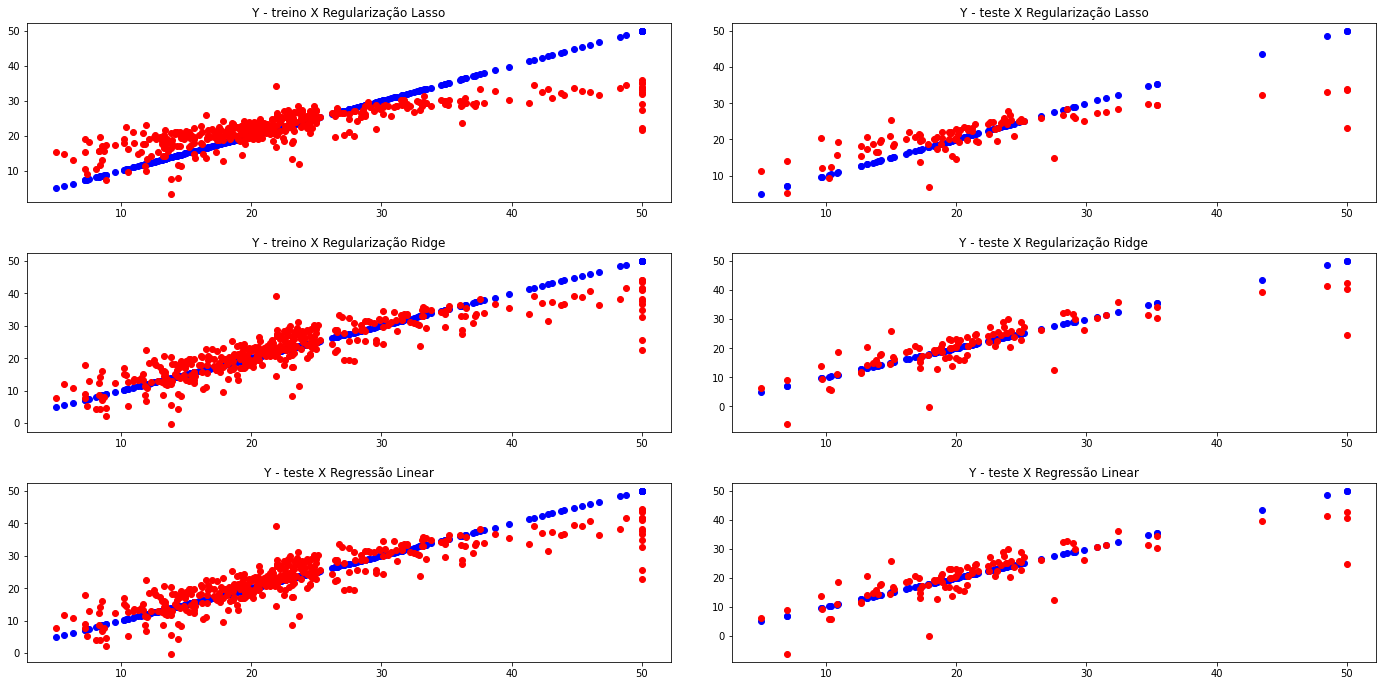

In [67]:
fig, ax = plt.subplots(nrows = 3, ncols = 2, figsize = (20,10))
fig.tight_layout(pad = 3.0)

#plota o scatterplot do y de treino com o y de treino predito junto com o valor verdadeiro usando regularização Lasso
ax[0][0].scatter(y_train, y_train, color = 'blue')
ax[0][0].scatter(y_train, treino_predito_l2, color = 'red')
ax[0][0].title.set_text("Y - treino X Regularização Lasso")

#plota o scatterplot do y de treino com o y de treino predito junto com o valor verdadeiro usando regularização Ridge
ax[1][0].scatter(y_train, y_train, color = 'blue')
ax[1][0].scatter(y_train, treino_predito_r2, color = 'red')
ax[1][0].title.set_text("Y - treino X Regularização Ridge")

#plota o scatterplot do y de teste com o y de teste predito junto com o valor verdadeiro usando reg. lasso
ax[0][1].scatter(y_test, y_test, color = 'blue')
ax[0][1].scatter(y_test, teste_predito_l2, color = 'red')
ax[0][1].title.set_text("Y - teste X Regularização Lasso")

#plota o scatterplot do y de teste com o y de teste predito junto com o valor verdadeiro usando reg. ridge
ax[1][1].scatter(y_test, y_test, color = 'blue')
ax[1][1].scatter(y_test, teste_predito_r2, color = 'red')
ax[1][1].title.set_text("Y - teste X Regularização Ridge")

#
ax[2][0].scatter(y_train, y_train, color = 'blue')
ax[2][0].scatter(y_train, modelo_linear_predito, color = 'red')
ax[2][0].title.set_text("Y - teste X Regressão Linear")

#
ax[2][1].scatter(y_test, y_test, color = 'blue')
ax[2][1].scatter(y_test, modelo_linear_preditot, color = 'red')
ax[2][1].title.set_text("Y - teste X Regressão Linear")

In [68]:
data1 = pd.DataFrame(treino_l, columns = ['MSE', 'Hiperparâmetro','R^2'])
data2 = pd.DataFrame(treino_r, columns = ['MSE', 'Hiperparâmetro','R^2'])
data3 = pd.DataFrame(treino_r2, columns = ['MSE', 'Hiperparâmetro','R^2'])
data4 = pd.DataFrame(treino_l, columns = ['MSE', 'Hiperparâmetro','R^2'])
data5 = pd.DataFrame(treino_r, columns = ['MSE', 'Hiperparâmetro','R^2'])

#print(data1)
#index = data1.index
#sns.pairplot(x = data1['Hiperparâmetro'], y = data1['MSE'])
#index.name = "Treino LR2"
#data1
#data2
#data3
#data4
#data5


In [69]:
data2 

,MSE,Hiperparâmetro,R^2
0,21.414363,2.00,0.764233
1,21.411633,1.50,0.764263
2,21.410529,1.25,0.764275
3,21.409607,1.00,0.764285
4,21.408875,0.75,0.764293
5,21.408752,0.70,0.764295
6,21.408531,0.60,0.764297
7,21.408432,0.55,0.764298
8,21.408342,0.50,0.764299
9,21.408015,0.25,0.764303


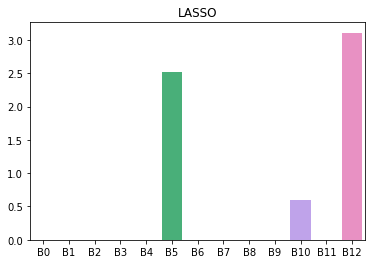

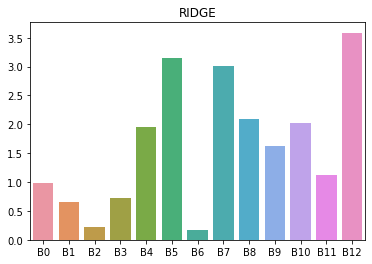

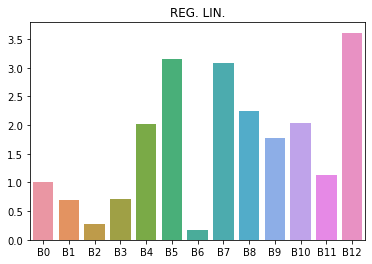

In [70]:
sns.barplot(x = ["B" + str(i) for i in range(13)], y = abs(lasso.coef_))
plt.title("LASSO")
plt.show()

sns.barplot(x = ["B" + str(i) for i in range(13)], y = abs(ridge.coef_))
plt.title("RIDGE")
plt.show()

sns.barplot(x = ["B" + str(i) for i in range(13)], y = abs(linear_model.coef_))
plt.title("REG. LIN.")
plt.show()